<a href="https://colab.research.google.com/github/arvinampongan/MIT504/blob/main/ACTIVITY_TIME_SERIES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVITY - Time Series Analysis with ARIMA Model

**1.) Importing**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

2. Loading dataset

In [3]:
data = pd.read_csv("supermarket_sales.csv") #data is variable only

3.) Converting

In [31]:
new_var = pd.date_range(start='01-01-2019', periods=len(data),freq='M')
data['Date'] = new_var
data.set_index('Date', inplace=True)

4.) plotting time series

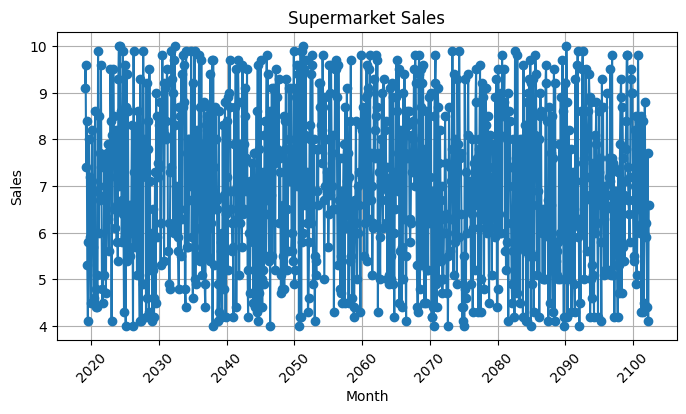

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(data.index,data['Rating'], marker='o', linestyle='-')
plt.title('Supermarket Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

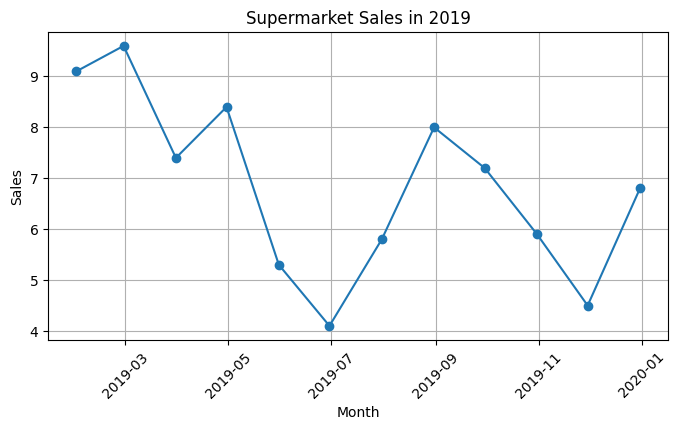

In [38]:
data_2019 = data[data.index.year == 2019]

plt.figure(figsize=(8, 4))
plt.plot(data_2019.index,data_2019['Rating'], marker='o', linestyle='-')
plt.title('Supermarket Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5.) Decomposition

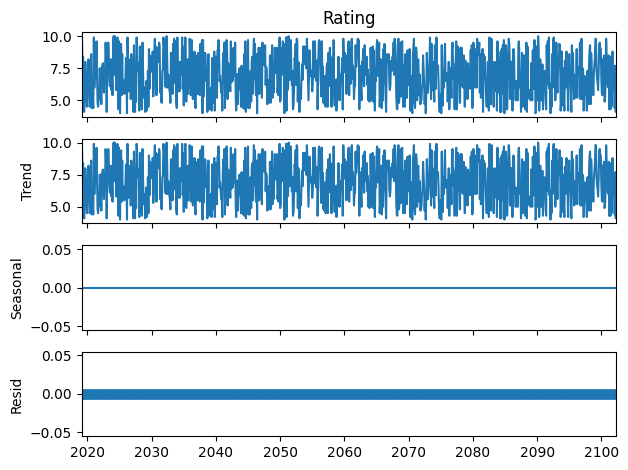

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Rating'], model='additive', period=1)

fig = decomposition.plot()

plt.show()

6.) Fit an ARIMA model

In [46]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Rating'], order=(5, 1, 0))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Rating   No. Observations:                 1000
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2028.059
Date:                Wed, 24 Jul 2024   AIC                           4068.117
Time:                        12:34:53   BIC                           4097.558
Sample:                    01-31-2019   HQIC                          4079.307
                         - 04-30-2102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8355      0.031    -26.662      0.000      -0.897      -0.774
ar.L2         -0.6649      0.040    -16.556      0.000      -0.744      -0.586
ar.L3         -0.4793      0.044    -10.948      0.0